In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn
from sklearn.linear_model import Ridge, Lasso

# EDA

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670.0,36,4891.67,6000
11,19.72,670.0,36,3575.00,2000
12,14.27,665.0,36,4250.00,10625
13,21.67,670.0,60,14166.67,28000
21,21.98,665.0,36,6666.67,22000


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2497.0,13.067521,4.180074,5.42,10.16,13.11,15.8,24.89
FICO.Score,2499.0,705.870348,35.029051,640.00,680.00,700.00,725.0,830.00
Loan.Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.00,17000.0,35000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 117.2 KB


In [5]:
df['Interest.Rate'] = df['Interest.Rate'].fillna(0)
df['FICO.Score'] = df['FICO.Score'].fillna(0)
df['Monthly.Income'] = df['Monthly.Income'].fillna(0)

In [6]:
df['FICO.Score'] = df['FICO.Score'].astype(int)
df['Monthly.Income'] = df['Monthly.Income'].astype(int)
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891,6000
11,19.72,670,36,3575,2000
12,14.27,665,36,4250,10625
13,21.67,670,60,14166,28000
21,21.98,665,36,6666,22000


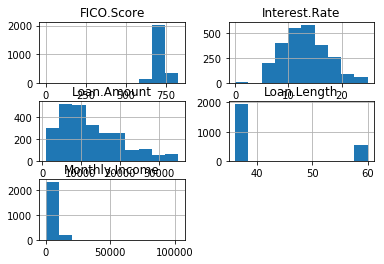

In [7]:
df.hist();

In [8]:
df['Interest.Rate'] = df['Interest.Rate']<9
df['Interest.Rate'] = df['Interest.Rate'].astype('int')

# Split and Scale

In [9]:
y = df.pop('Interest.Rate')
X = df

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

c:\users\ensx4if\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\ensx4if\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ensx4if\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Grid Search

In [11]:
params = {
          'penalty': ['l2'], 
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'fit_intercept': [True, False],
          'C': np.logspace(-3,3)
         }
gs = GridSearchCV(LogisticRegression(), param_grid=params,scoring='neg_log_loss', cv=10, n_jobs=5).fit(X_train, y_train)
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'fit_intercept': [True, False], 'C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.2230... 1.84207e+02, 2.44205e+02,
       3.23746e+02, 4.29193e+02, 5.68987e+02, 7.54312e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [12]:
params1 = {
          'penalty': ['l1'], 
          'solver': ['liblinear','saga'],
          'fit_intercept': [True, False],
          'C': np.logspace(-3,3)
         }
gs1 = GridSearchCV(LogisticRegression(), param_grid=params1,scoring='neg_log_loss', cv=10, n_jobs=5).fit(X_train, y_train)
gs1

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'fit_intercept': [True, False], 'C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.22300e-02, 2.94705e-02, 3.90694e-... 1.84207e+02, 2.44205e+02,
       3.23746e+02, 4.29193e+02, 5.68987e+02, 7.54312e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

# Results

In [13]:
gs.best_params_

{'C': 1000.0, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}

In [14]:
gs.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [15]:
gs1.best_params_

{'C': 429.1934260128778,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [16]:
gs1.best_estimator_

LogisticRegression(C=429.1934260128778, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Final Model

In [18]:
model = LogisticRegression(**gs1.best_params_).fit(X_train, y_train)

In [19]:
y_hat = model.predict(X_test)
p_hat = model.predict_proba(X_test)[:,1]

In [20]:
log_loss(y_test, p_hat)

0.2229222268764665

In [21]:
precision_score(y_test, y_hat)

0.8705035971223022

In [22]:
recall_score(y_test, y_hat)

0.6722222222222223

In [23]:
baseline = 1 - (y_test.sum() / y_test.size)
accuracy = accuracy_score(y_test, y_hat)
baseline, accuracy

(0.7818181818181819, 0.9066666666666666)

# ROC Curve

In [24]:
auc = roc_auc_score(y_test, p_hat)
auc

0.9619465977605512

In [25]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
for th, fp, tp in zip(thr, fpr, tpr):
    print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

2.00 0.00 0.00
1.00 0.00 0.01
0.95 0.00 0.13
0.95 0.00 0.13
0.93 0.00 0.18
0.93 0.00 0.18
0.91 0.00 0.22
0.90 0.00 0.22
0.85 0.00 0.30
0.84 0.01 0.30
0.84 0.01 0.32
0.84 0.01 0.32
0.79 0.01 0.37
0.79 0.01 0.37
0.76 0.01 0.38
0.76 0.01 0.38
0.74 0.01 0.41
0.74 0.01 0.41
0.67 0.01 0.49
0.66 0.01 0.49
0.59 0.01 0.54
0.59 0.02 0.54
0.58 0.02 0.56
0.58 0.02 0.56
0.57 0.02 0.57
0.57 0.02 0.57
0.56 0.02 0.59
0.55 0.02 0.59
0.55 0.02 0.60
0.54 0.03 0.60
0.50 0.03 0.67
0.50 0.03 0.67
0.50 0.03 0.67
0.50 0.03 0.67
0.49 0.03 0.69
0.48 0.03 0.69
0.47 0.03 0.72
0.47 0.03 0.72
0.46 0.03 0.73
0.45 0.04 0.73
0.44 0.04 0.74
0.43 0.04 0.74
0.43 0.04 0.75
0.43 0.04 0.75
0.43 0.04 0.77
0.43 0.04 0.77
0.42 0.04 0.79
0.42 0.05 0.79
0.41 0.05 0.80
0.41 0.05 0.80
0.40 0.05 0.81
0.39 0.05 0.81
0.37 0.05 0.82
0.37 0.05 0.82
0.37 0.05 0.83
0.37 0.06 0.83
0.35 0.06 0.84
0.34 0.06 0.84
0.34 0.06 0.85
0.34 0.06 0.85
0.34 0.06 0.86
0.33 0.07 0.86
0.32 0.07 0.88
0.32 0.07 0.88
0.31 0.07 0.88
0.31 0.07 0.88
0.31 0.07 

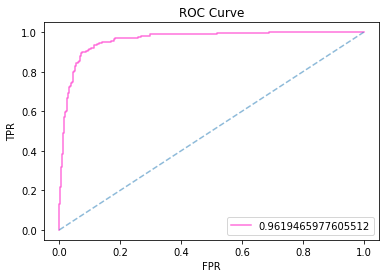

In [26]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()